## CLASSIFICATION AND REGRESSION USING DECISION TREES (CART)

In [1]:
#importing libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score, cross_val_predict

from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
#importing dataset
hr_df=pd.read_excel('HR_comma_sep.xlsx')
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,low,4649
1,0.80,0.86,5,262,6,0,1,0,sales,medium,34126
2,0.11,0.88,7,272,4,0,1,0,sales,medium,40522
3,0.72,0.87,5,223,5,0,1,0,sales,low,6916
4,0.37,0.52,2,159,3,0,1,0,sales,low,10928


In [3]:
print('No of Rows',hr_df.shape[0])
print('No of Columns',hr_df.shape[1])

No of Rows 14999
No of Columns 11


##### TASK 1

##### DATA EXPLORATION AND VISUALIZATION

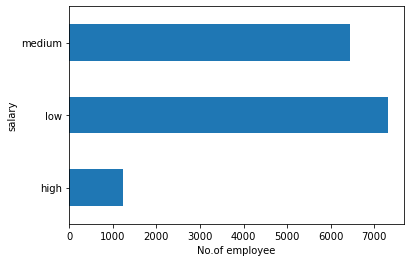

In [4]:
#A)Impact of salary on employee retention
df1=hr_df[hr_df.left==0]

a=hr_df.groupby(by='salary')['salary'].count()

a.plot(x='salary',kind='barh')
plt.xlabel('No.of employee')
plt.show()

In [5]:
#B)Department wise employee retention rate
b=hr_df.groupby(by=['Department','left'])['left'].count()

#retention rate
rr=[b[0]/(b[0]+b[1]),b[2]/(b[2]+b[3]),b[4]/(b[4]+b[5]),b[6]/(b[6]+b[7]),b[8]/(b[8]+b[9]),b[10]/(b[10]+b[11]),b[12]/(b[12]+b[13]),b[14]/(b[14]+b[15]),b[16]/(b[16]+b[17]),b[18]/(b[18]+b[19])]
name=['IT','RandD','accounting','hr','management','marketing','product_mng','sales','support','technical']   
DF=pd.DataFrame(name,columns=['DEPARTMENT'])
DF['RATE']=rr
DF.sort_values(by='RATE', ascending=False)

,DEPARTMENT,RATE
4,management,0.855556
1,RandD,0.846252
6,product_mng,0.780488
0,IT,0.777506
5,marketing,0.763403
7,sales,0.755072
8,support,0.751009
9,technical,0.743750
2,accounting,0.734029
3,hr,0.709066


##### TASK 2

#####  DATA PREPROCESSING

In [6]:
#A)GETTING INFORMATION OF DATASET  -  WITH DATA_TYPES AND MISSING_VALUES
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  salary_num             14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


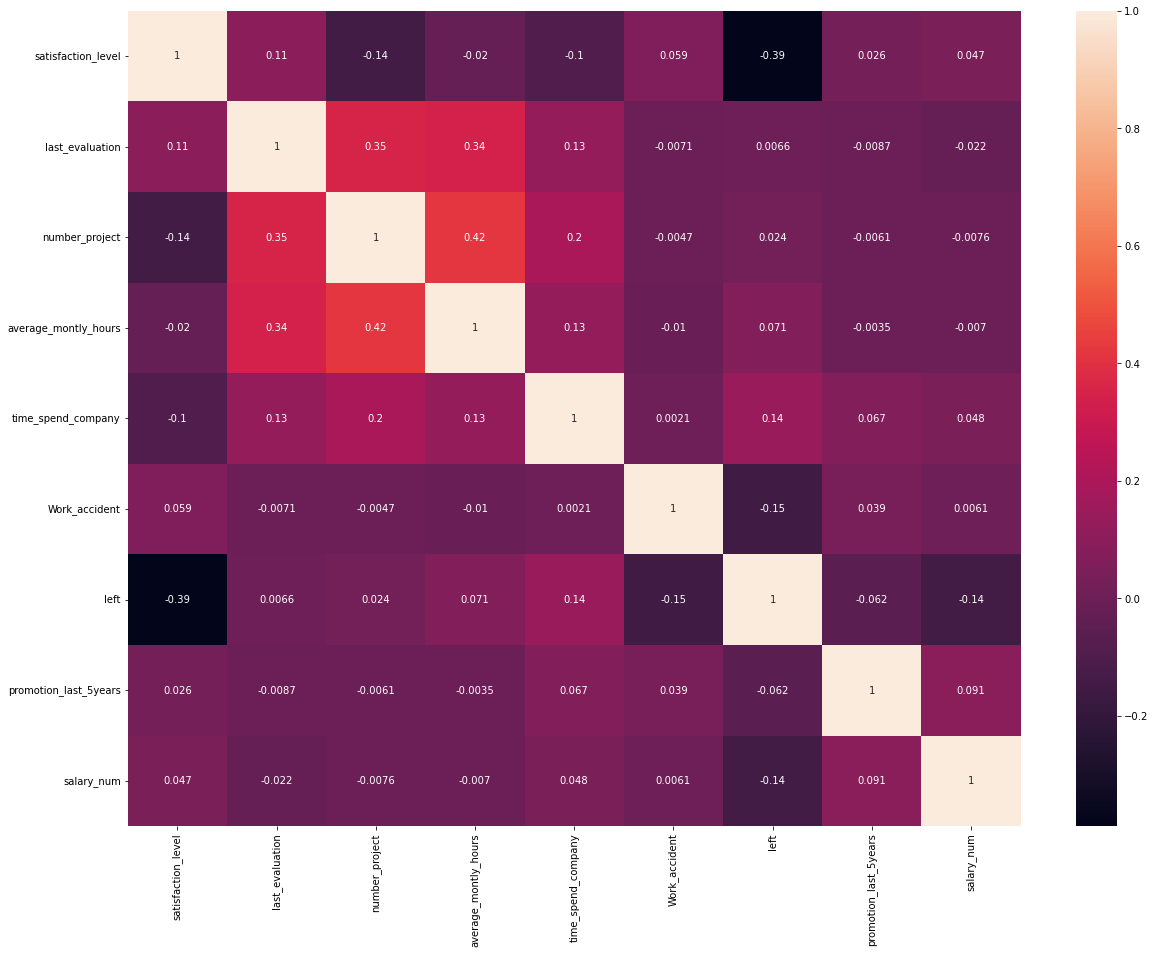

In [7]:
#B)detecting correlation
fig,ax=plt.subplots(figsize=(20,15))
sns.heatmap(hr_df.corr(),annot=True);
plt.show()

##### DATA PREPARATION

In [8]:
#Encoding salary & department variable to numerical variable
surviver_encoder = preprocessing.LabelEncoder()

# Encoding of the salary
surviver_encoder.fit(hr_df.salary)
print(surviver_encoder.classes_)
hr_df.salary = surviver_encoder.transform(hr_df.salary)

#Encoding of the department
surviver_encoder.fit(hr_df.Department)
print(surviver_encoder.classes_)
hr_df.Department = surviver_encoder.transform(hr_df.Department)

['high' 'low' 'medium']
['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']


In [9]:
#CHANGING THE TYPE AS CATEGORICAL 
hr_df['Department'] = hr_df.Department.astype('category')

In [10]:
# CRETAING DUMMIES FOR Department
Department_dummies = pd.get_dummies(hr_df.Department, prefix="Department")
hrdf_with_dummies = pd.concat([hr_df,Department_dummies],axis='columns')
hrdf_with_dummies.drop('Department',axis='columns',inplace=True)

In [11]:
hr_df=hrdf_with_dummies

##### TASK 3

##### MODELLING
##### DECISION TREE-->CLASSIFICATION

Target variable is LEFT,it is categorical data.So, we go for CLASSIFICATION

In [12]:
#SPLITTING DATASET INTO FEATURES AND TARGET
features=['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident','promotion_last_5years', 'salary', 'salary_num','Department_0','Department_1','Department_2','Department_3','Department_4','Department_5','Department_6','Department_7','Department_8','Department_9']
X=hr_df[features]
y=hr_df.left
X.shape,y.shape

((14999, 19), (14999,))

In [13]:
#A)SPLITTING DATASET INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10499, 19), (4500, 19), (10499,), (4500,))

In [14]:
#B)CREATE DECISION TREE CLASSIFIER OBJECT(DTC)
clf = DecisionTreeClassifier(max_depth=3)

# FIT DTC
clf.fit(X_train,y_train)

#PREDICTING RESPONSE FOR TEST SET
y_pred= clf.predict(X_test)

In [15]:
#C) ACCURACY FOR TEST AND TRAIN DATASET
print("Accuracy for TEST DATASET:",round(clf.score(X_test,y_test)*100,2),'%')
print("Accuracy for TRAIN DATASET:",round(clf.score(X_train,y_train)*100,2),'%')

Accuracy for TEST DATASET: 95.18 %
Accuracy for TRAIN DATASET: 95.34 %


##### VISUALIZATION

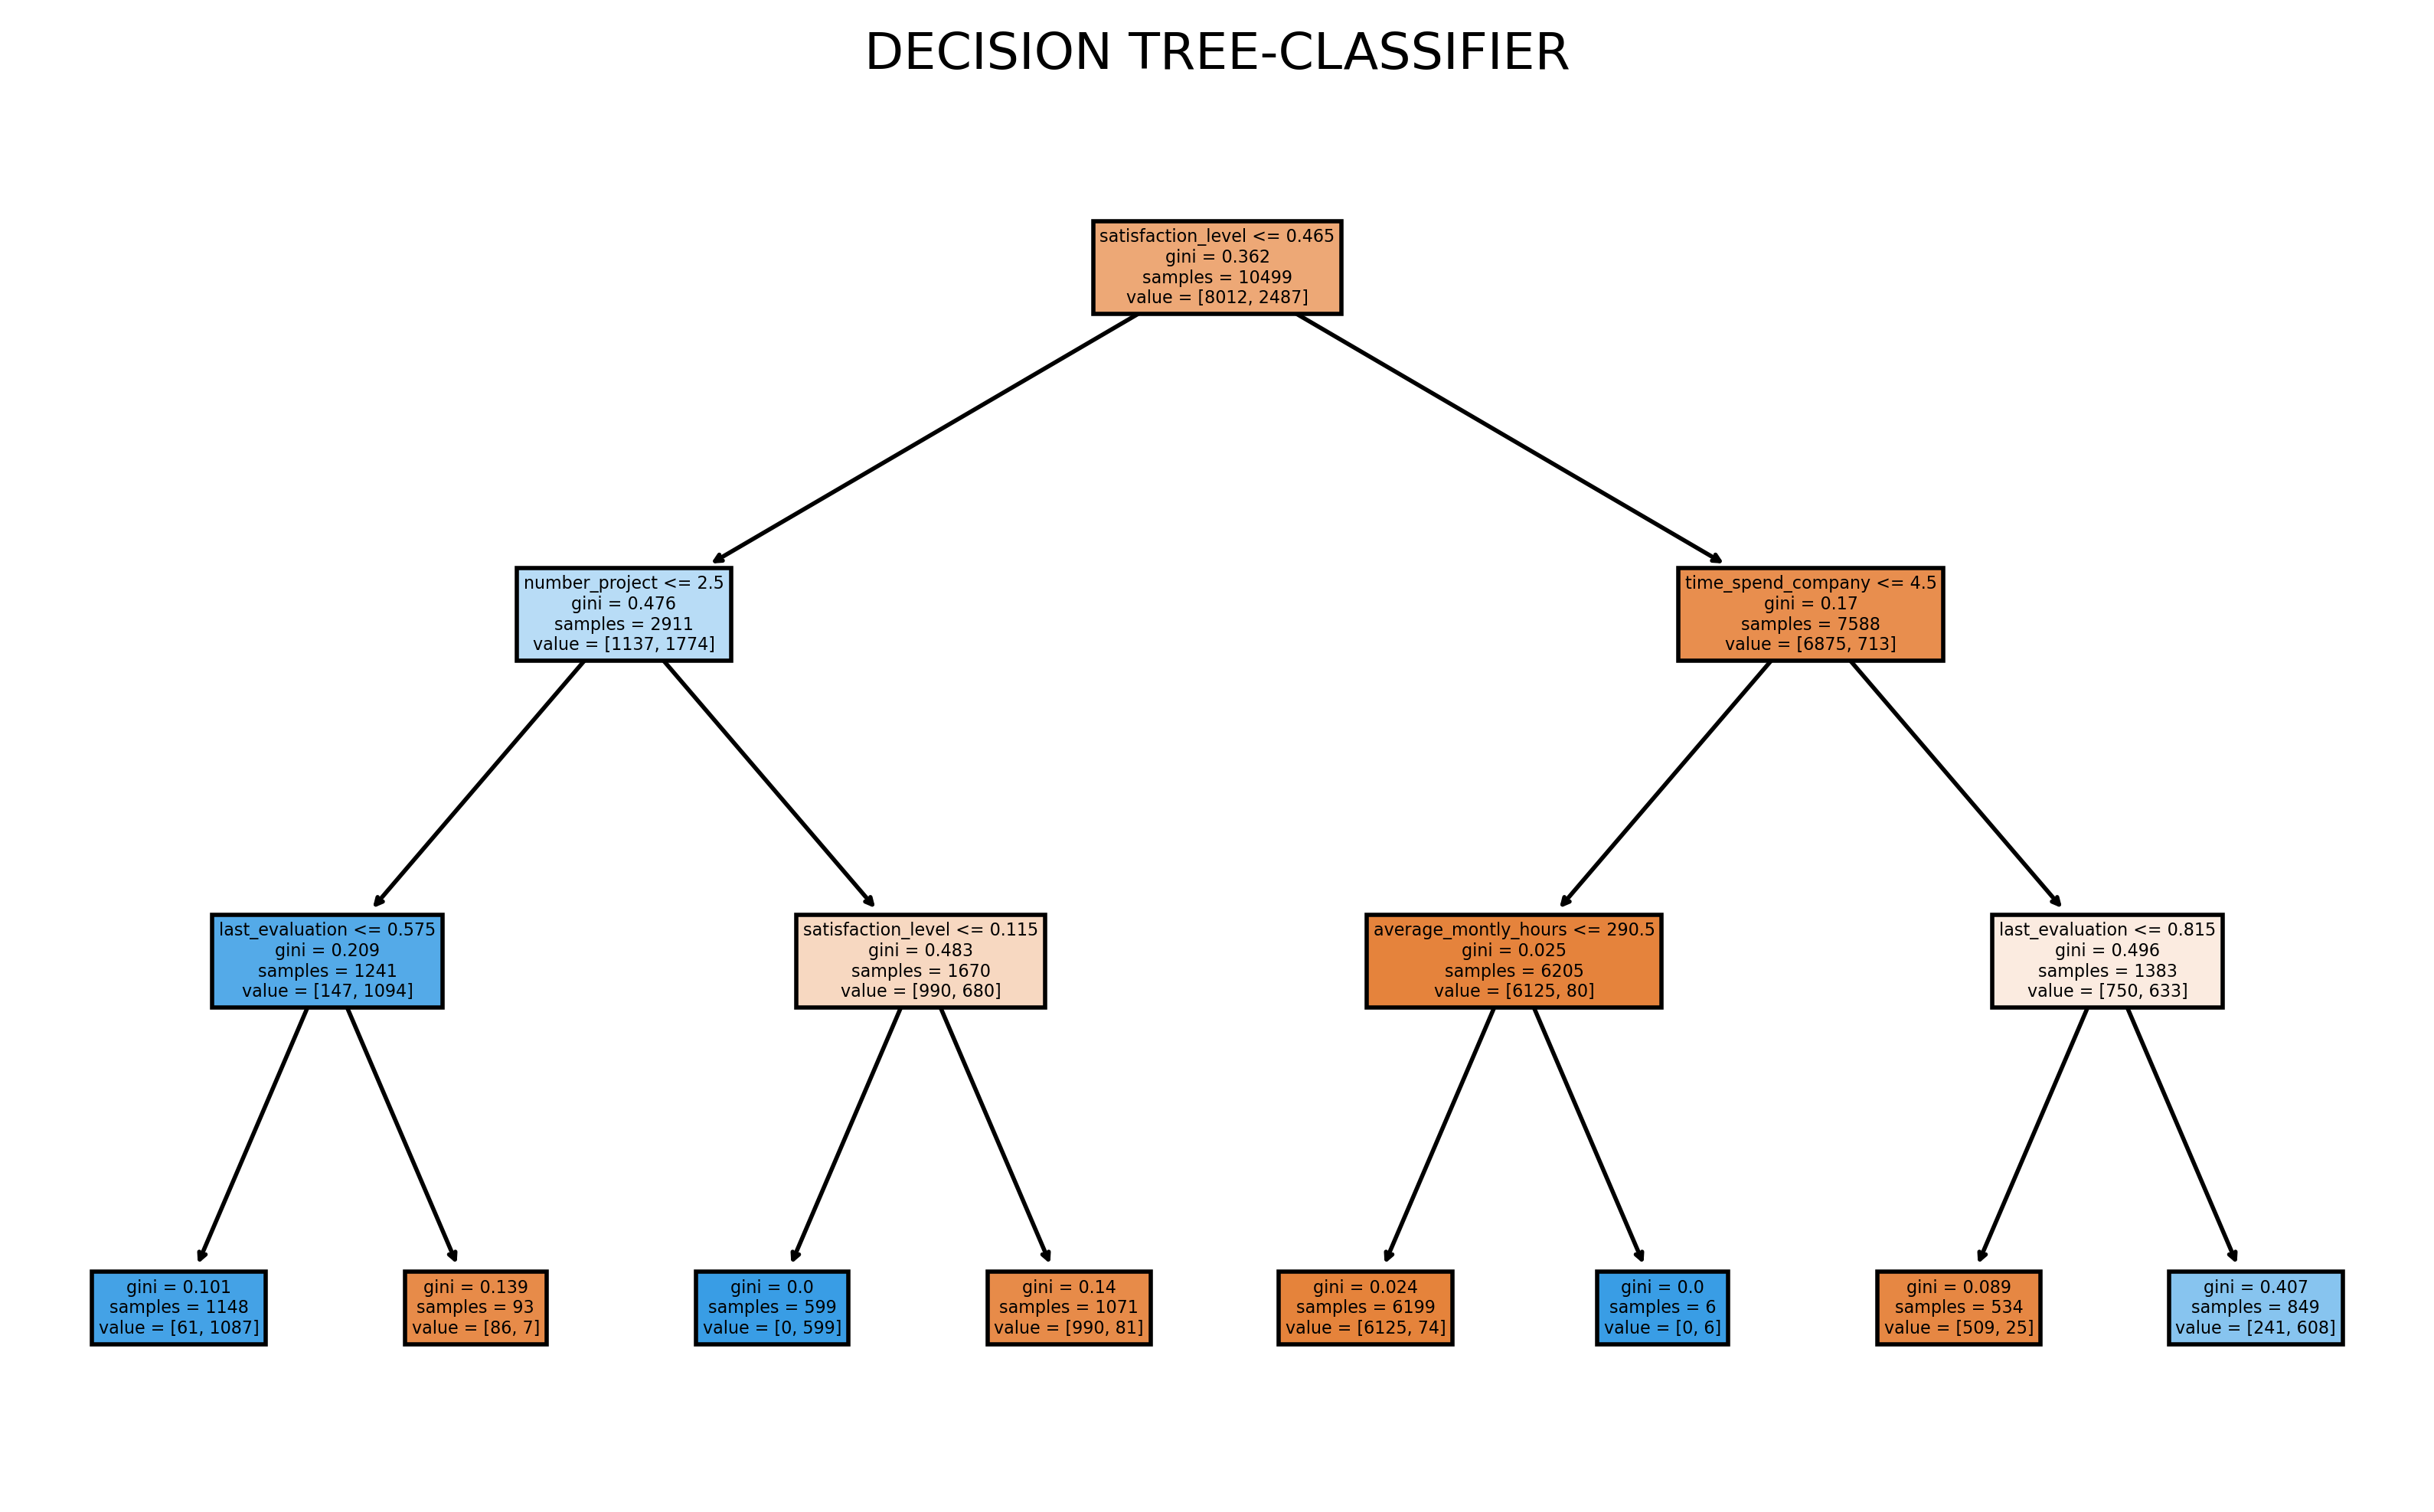

In [16]:

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,6), dpi=400)

tree.plot_tree(clf,
           feature_names = features, 
           filled = True);
plt.title('DECISION TREE-CLASSIFIER')
plt.show()
# fig.savefig('Hr_Tree.png')

##### TASK 4

##### MODEL EVALUATION -  CONFUSION MATRIX AND AUC

In [17]:
#A)
from sklearn.metrics import confusion_matrix,recall_score,f1_score,accuracy_score,precision_score,roc_auc_score

print('CONFUSION MATRIX:\n',confusion_matrix(y_test,y_pred))
print('\nACCURACY:', accuracy_score(y_test, y_pred))
print('RECALL:', recall_score(y_test, y_pred, average='weighted'))
print('F1-SCORE:', f1_score(y_test, y_pred, average='weighted'))
print('PRECISION:', precision_score(y_test, y_pred))

#B)calculating AUC

auc=roc_auc_score(y_test,y_pred)
print('\nAUC:',auc)

CONFUSION MATRIX:
 [[3294  122]
 [  95  989]]

ACCURACY: 0.9517777777777777
RECALL: 0.9517777777777777
F1-SCORE: 0.9519786959690447
PRECISION: 0.8901890189018902

AUC: 0.9383236689509753


##### TASK 5

##### DECISION TREE - REGRESSION

Here, TARGET-->SALARY_NUM .So, we go for REGRESSION

In [18]:
#EXCLUDING 'LEFT' AND 'SALARY' from dataset
hr1_df=hr_df.copy()
hr1_df.drop(['left','salary'], axis = 1,inplace=True)

In [19]:
#PRINTING NUMBER OF ROWS AND COLUMNS AFTER REMOVING 2 COLUMNS FROM TOTAL 11 COLUMNS
print('No of Rows',hr1_df.shape[0])
print('No of Columns',hr1_df.shape[1])
hr1_df.head(2)

No of Rows 14999
No of Columns 18


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_num,Department_0,Department_1,Department_2,Department_3,Department_4,Department_5,Department_6,Department_7,Department_8,Department_9
0,0.38,0.53,2,157,3,0,0,4649,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,34126,0,0,0,0,0,0,0,1,0,0


In [20]:
#GETTING INFORMATION OF DATASET
hr1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   salary_num             14999 non-null  int64  
 8   Department_0           14999 non-null  uint8  
 9   Department_1           14999 non-null  uint8  
 10  Department_2           14999 non-null  uint8  
 11  Department_3           14999 non-null  uint8  
 12  Department_4           14999 non-null  uint8  
 13  Department_5           14999 non-null  uint8  
 14  Department_6           14999 non-null  uint8  
 15  De

###### ENCODING

In [21]:
#SPLITTING THE DATASET (hr1_df)
X = hr1_df
y=hr1_df.salary_num

In [22]:
#DIVIDING DATSET INTO TRAIN AND TEST SET
df_train, df_test = train_test_split(X, train_size=0.7)
print('Size of training dataset: ', df_train.shape)
print('Size of test dataset: ', df_test.shape)

Size of training dataset:  (10499, 18)
Size of test dataset:  (4500, 18)


In [23]:
#ASSIGNING FOR X AND y -TRAIN AND IEST 
X_train = df_train.drop(columns='salary_num', axis =1)
y_train = df_train['salary_num']
X_test = df_test.drop(columns='salary_num', axis =1)
y_test = df_test['salary_num']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10499, 17), (10499,), (4500, 17), (4500,))

###### MODELLING

In [24]:
#CREATE DECISION TREE REGRESSION OBJECT(DTR)
dtm = DecisionTreeRegressor(max_depth=4,min_samples_split=5,max_leaf_nodes=10)

# FIT DTC & PREDICTING RESPONSE FOR TEST SET
dtm.fit(X_train,y_train)
print("R-SQUARE FOR TRAIN DATASET:",round(dtm.score(X_train,y_train)*100,2),'%')

# FIT DTC & PREDICTING RESPONSE FOR TEST SET
dtm.fit(X_test,y_test)   
print("R-SQUARE FOR TEST DATASET:",round(dtm.score(X_test,y_test)*100,2),'%')

R-SQUARE FOR TRAIN DATASET: 7.33 %
R-SQUARE FOR TEST DATASET: 6.91 %


###### VISUALIZING

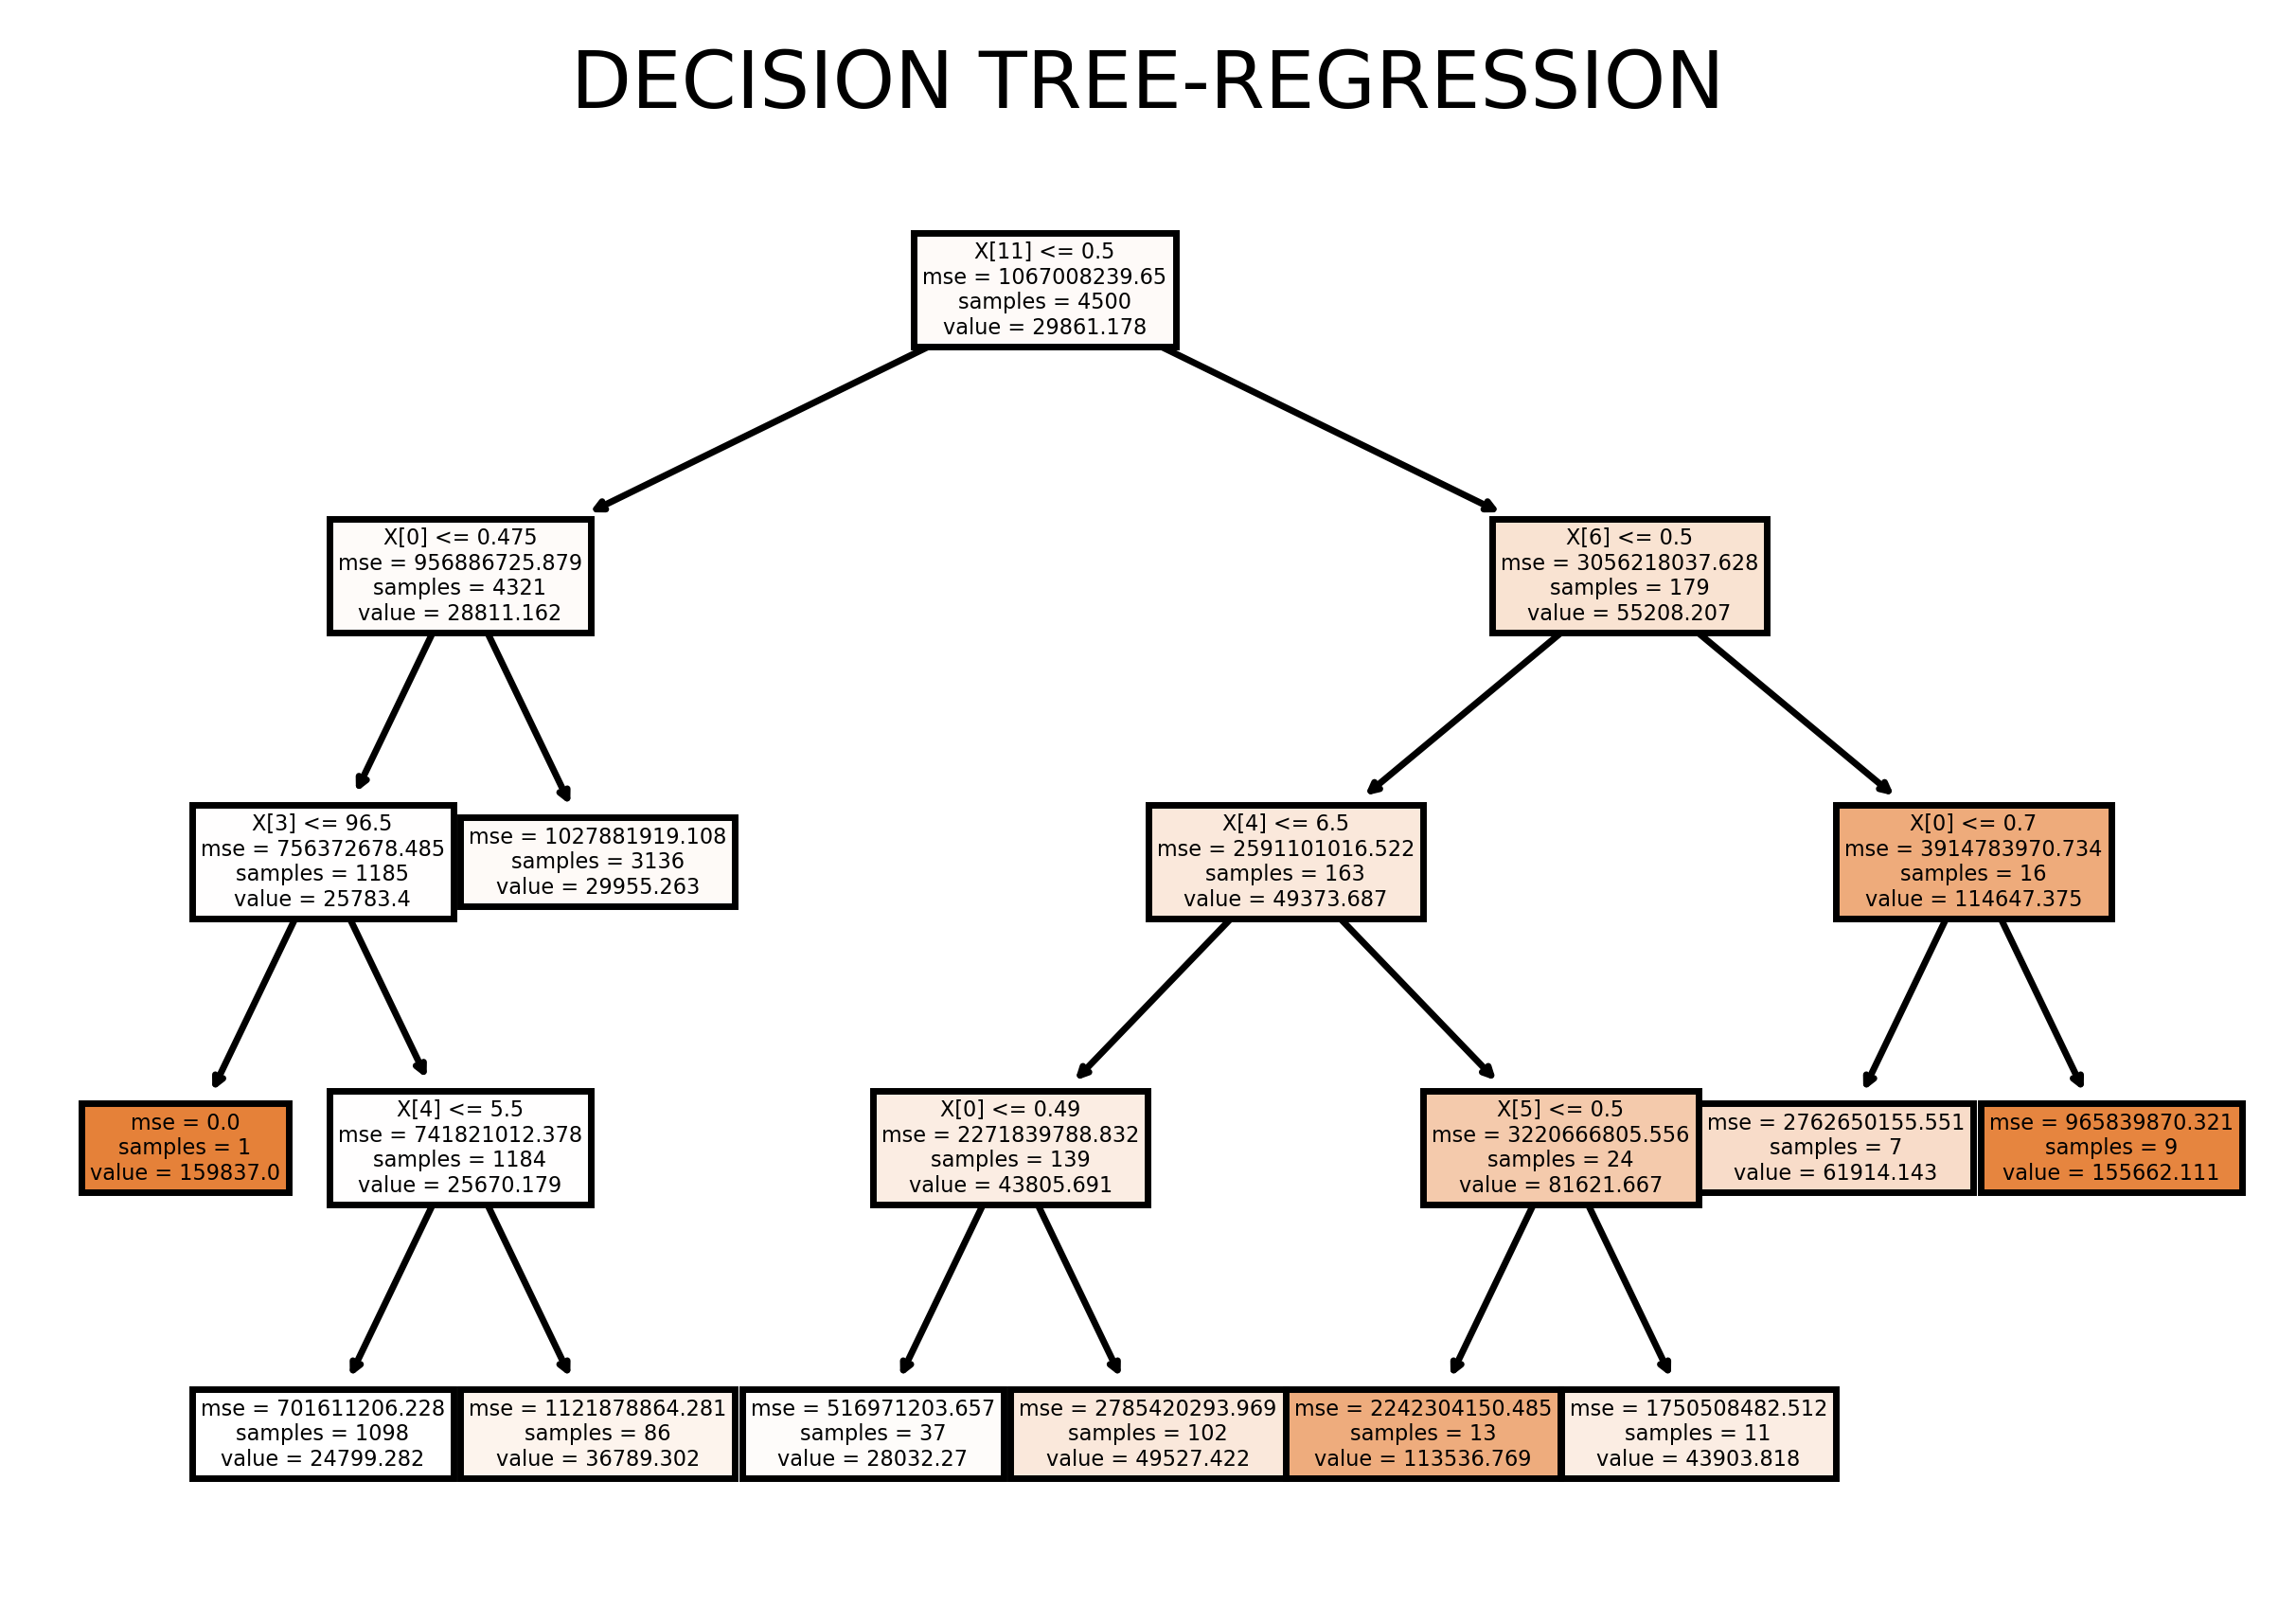

In [25]:
fig, axes = plt.subplots(dpi=500)

tree.plot_tree(dtm,filled = True)
plt.title('DECISION TREE-REGRESSION')
plt.show()
#fig.savefig('hr1_regression_decisiontree.png')

In [26]:
#END